In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
covid = pd.read_csv('covid.csv')

In [3]:
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [4]:
covid.shape

(19496, 32)

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19496 entries, 0 to 19495
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         19432 non-null  object 
 1   location                         19496 non-null  object 
 2   date                             19496 non-null  object 
 3   total_cases                      19496 non-null  int64  
 4   new_cases                        19496 non-null  int64  
 5   total_deaths                     19496 non-null  int64  
 6   new_deaths                       19496 non-null  int64  
 7   total_cases_per_million          19119 non-null  float64
 8   new_cases_per_million            19119 non-null  float64
 9   total_deaths_per_million         19119 non-null  float64
 10  new_deaths_per_million           19119 non-null  float64
 11  total_tests                      5164 non-null   float64
 12  new_tests         

In [6]:
covid.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [7]:
covid["location"].value_counts()

Belgium           146
Austria           146
Belarus           146
Singapore         146
United States     146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: location, Length: 212, dtype: int64

In [8]:
covid.isna().any()

iso_code                            True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older                       True
gdp_per_capita  

In [9]:
covid.isna().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

In [10]:
chile_case = covid[covid['location']=='Chile']
chile_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
3287,CHL,Chile,2020-03-04,1,1,0,0,0.052,0.052,0.0,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11
3288,CHL,Chile,2020-03-05,3,2,0,0,0.157,0.105,0.0,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11
3289,CHL,Chile,2020-03-06,4,1,0,0,0.209,0.052,0.0,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11
3290,CHL,Chile,2020-03-07,5,1,0,0,0.262,0.052,0.0,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11
3291,CHL,Chile,2020-03-09,10,5,0,0,0.523,0.262,0.0,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11


In [11]:
chile_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
3363,CHL,Chile,2020-05-20,49579,3520,509,31,2593.558,184.137,26.627,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11
3364,CHL,Chile,2020-05-21,53617,4038,544,35,2804.793,211.234,28.458,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11
3365,CHL,Chile,2020-05-22,57581,3964,589,45,3012.156,207.363,30.812,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11
3366,CHL,Chile,2020-05-23,61857,4276,630,41,3235.840,223.685,32.956,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11
3367,CHL,Chile,2020-05-24,65393,3536,673,43,3420.814,184.974,35.206,...,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11


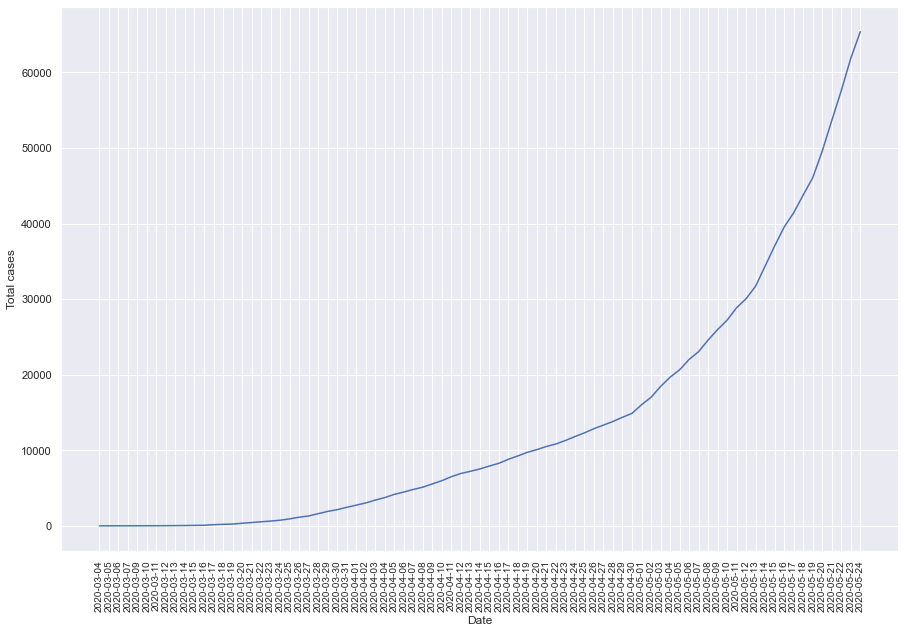

In [12]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=chile_case)
plt.xlabel("Date")
plt.ylabel("Total cases")
plt.xticks(rotation= 90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()


In [13]:
chile_last_5_days=chile_case.tail()


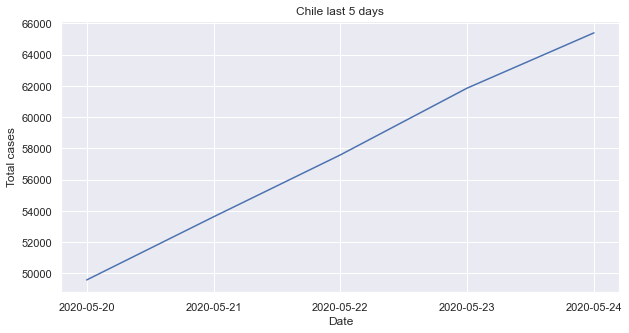

In [14]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x="date",y="total_cases",data=chile_last_5_days)
plt.xlabel("Date")
plt.ylabel("Total cases")
plt.title("Chile last 5 days")
plt.show()

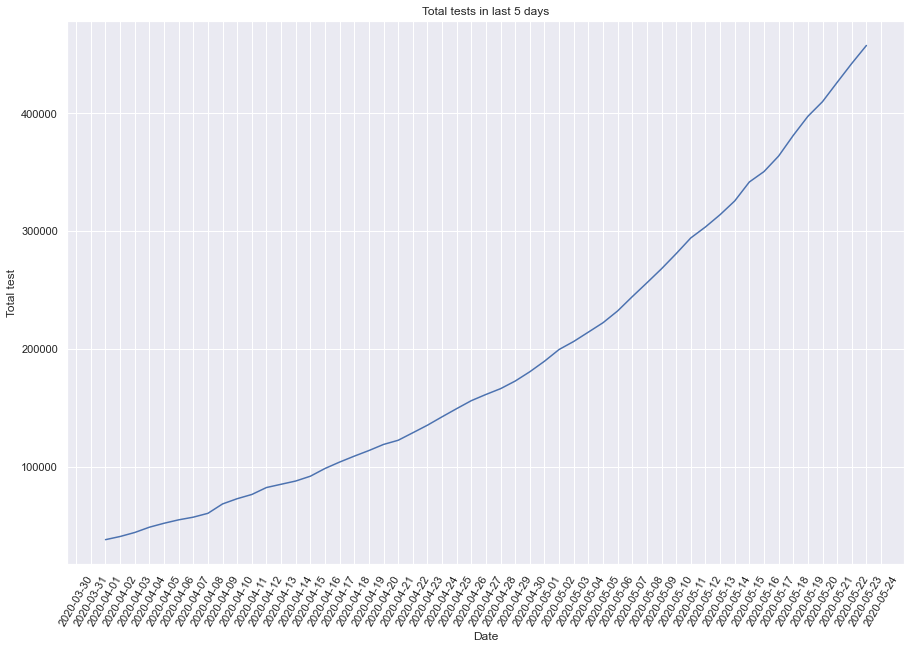

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=chile_case)
plt.title("Total tests in last 5 days")
plt.xlabel("Date")
plt.ylabel("Total test")
plt.xticks(rotation=60)
plt.show()

In [16]:
last_day_cases=covid[covid["date"]=="2020-05-24"]
last_day_cases

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
62,ABW,Aruba,2020-05-24,101,0,3,0,945.994,0.000,28.099,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
198,AFG,Afghanistan,2020-05-24,9998,782,216,11,256.831,20.088,5.549,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500
262,AGO,Angola,2020-05-24,60,0,3,0,1.826,0.000,0.091,...,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,ALB,Albania,2020-05-24,989,8,31,0,343.665,2.780,10.772,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,YEM,Yemen,2020-05-24,212,7,39,6,7.108,0.235,1.308,...,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
19153,ZAF,South Africa,2020-05-24,21343,1218,407,10,359.863,20.537,6.862,...,5.344,3.053,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320
19220,ZMB,Zambia,2020-05-24,920,0,7,0,50.044,0.000,0.381,...,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000
19285,ZWE,Zimbabwe,2020-05-24,56,0,4,0,3.768,0.000,0.269,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700


In [17]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
19431,OWID_WRL,World,2020-05-24,5273572,97636,341722,3633,676.550,12.526,43.840,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,VGB,British Virgin Islands,2020-05-24,8,0,1,0,264.577,0.000,33.072,...,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
1645,BES,Bonaire Sint Eustatius and Saba,2020-05-24,6,0,0,0,228.824,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5543,ESH,Western Sahara,2020-05-24,6,0,0,0,10.045,0.000,0.000,...,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
max_cases_country[1:6]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
4613,DEU,Germany,2020-05-24,178281,431,8247,31,2127.866,5.144,98.432,...,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00


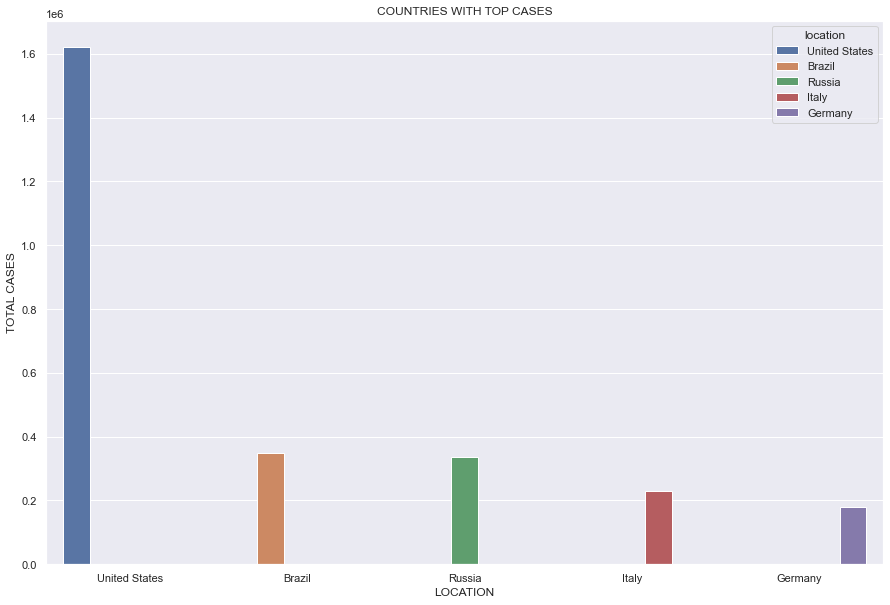

In [19]:
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="location")
plt.title("COUNTRIES WITH TOP CASES")
plt.xlabel("LOCATION")
plt.ylabel("TOTAL CASES")
plt.show()